**MOBILE PRICE PREDICTION USING ML**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/content/mobile data.csv')
df.head(10)

,s.no,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,64.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,32,15.0,3800,18999
5,5,"Apple iPhone 11 Pro (Space Grey, 512 )",4.7,8.0,128.0,5.80,32,12.0,5000,40300
6,6,"Samsung Galaxy A70s (Prism Crush Red, 128 )",4.4,8.0,128.0,6.70,64,16.0,4700,29999
7,7,"Samsung Galaxy S10 Lite (Prism Blue, 512 )",4.5,8.0,128.0,6.70,48,12.0,4700,47999
8,8,"OPPO A9 (Marble Green, 128 )",4.4,4.0,128.0,6.53,48,13.0,4020,16490
9,9,"POCO F1 (Graphite Black, 256 )",4.5,8.0,256.0,6.18,35,16.0,3800,22999


In [3]:
df.drop(['s.no'],axis=1,inplace=True)

In [4]:
df

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia 105 ss,4.3,4.0,64.0,4.50,64,16.0,4000,15000
3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,32,15.0,3800,18999
...,...,...,...,...,...,...,...,...,...
831,Karbonn K24 Plus Pro,3.8,6.0,32.0,4.54,48,12.0,2800,1299
832,InFocus POWER 2,4.1,8.0,64.0,4.54,64,NaN,2500,1390
833,"Alcatel 5V (Spectrum Blue, 32 )",4.4,3.0,32.0,6.20,48,1.0,3800,9790
834,JIVI JV 12M,3.7,10.0,32.0,4.50,64,NaN,3500,799


In [5]:
df.isnull().sum()

Brand me           0
Ratings           28
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        262
Battery_Power      0
Price              0
dtype: int64

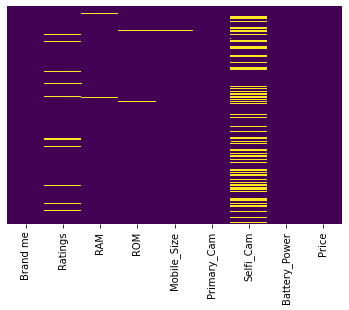

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand me       836 non-null    object 
 1   Ratings        808 non-null    float64
 2   RAM            829 non-null    float64
 3   ROM            832 non-null    float64
 4   Mobile_Size    834 non-null    float64
 5   Primary_Cam    836 non-null    int64  
 6   Selfi_Cam      574 non-null    float64
 7   Battery_Power  836 non-null    int64  
 8   Price          836 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 58.9+ KB


In [8]:
df.dtypes

Brand me          object
Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [9]:
df.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,808.000000,829.000000,832.000000,834.000000,836.000000,574.000000,836.000000,836.000000
mean,4.101980,6.071170,64.493269,5.606874,47.966507,9.850174,3283.660287,18319.788278
std,0.365143,2.522555,53.388278,3.894716,11.107157,6.429252,922.947991,52565.664093
min,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,985.000000
50%,4.100000,6.000000,45.500000,4.770000,48.000000,8.000000,3000.000000,1799.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.000000
max,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.000000


In [10]:
df.corr()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
Ratings,1.000000,0.102994,0.460650,0.087256,-0.100235,-0.154980,0.472011,0.360979
RAM,0.102994,1.000000,0.252091,0.002113,0.133427,0.217881,0.026871,0.237251
ROM,0.460650,0.252091,1.000000,0.106390,-0.068257,-0.083235,0.407077,0.250645
Mobile_Size,0.087256,0.002113,0.106390,1.000000,-0.055254,-0.055147,0.126346,0.047257
Primary_Cam,-0.100235,0.133427,-0.068257,-0.055254,1.000000,0.198590,-0.047093,-0.154318
Selfi_Cam,-0.154980,0.217881,-0.083235,-0.055147,0.198590,1.000000,-0.201370,-0.040305
Battery_Power,0.472011,0.026871,0.407077,0.126346,-0.047093,-0.201370,1.000000,0.161305
Price,0.360979,0.237251,0.250645,0.047257,-0.154318,-0.040305,0.161305,1.000000


In [11]:
df.drop(['Brand me'],axis=1,inplace=True)

In [12]:
df.isnull().sum()

Ratings           28
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        262
Battery_Power      0
Price              0
dtype: int64

In [13]:
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mode()[0])
df['RAM'] = df['RAM'].fillna(df['RAM'].mode()[0])
df['ROM'] = df['ROM'].fillna(df['ROM'].mode()[0])
df['Mobile_Size'] = df['Mobile_Size'].fillna(df['Mobile_Size'].mode()[0])
df['Selfi_Cam'] = df['Selfi_Cam'].fillna(df['Selfi_Cam'].mode()[0])

In [14]:
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

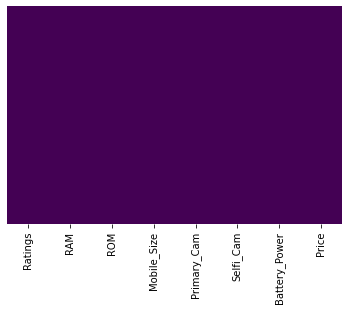

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df['RAM'] = df['RAM'].astype('int64')
df['ROM'] = df['ROM'].astype('int64')
df['Selfi_Cam'] = df['Selfi_Cam'].astype('int64')

In [17]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,64,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,32,15,3800,18999


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        836 non-null    float64
 1   RAM            836 non-null    int64  
 2   ROM            836 non-null    int64  
 3   Mobile_Size    836 non-null    float64
 4   Primary_Cam    836 non-null    int64  
 5   Selfi_Cam      836 non-null    int64  
 6   Battery_Power  836 non-null    int64  
 7   Price          836 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 52.4 KB


In [19]:
corr = df.corr()
print(corr['Price'].sort_values(ascending = False),'/n')

Price            1.000000
Ratings          0.342678
ROM              0.251293
RAM              0.237227
Battery_Power    0.161305
Mobile_Size      0.047465
Selfi_Cam       -0.004409
Primary_Cam     -0.154318
Name: Price, dtype: float64 /n


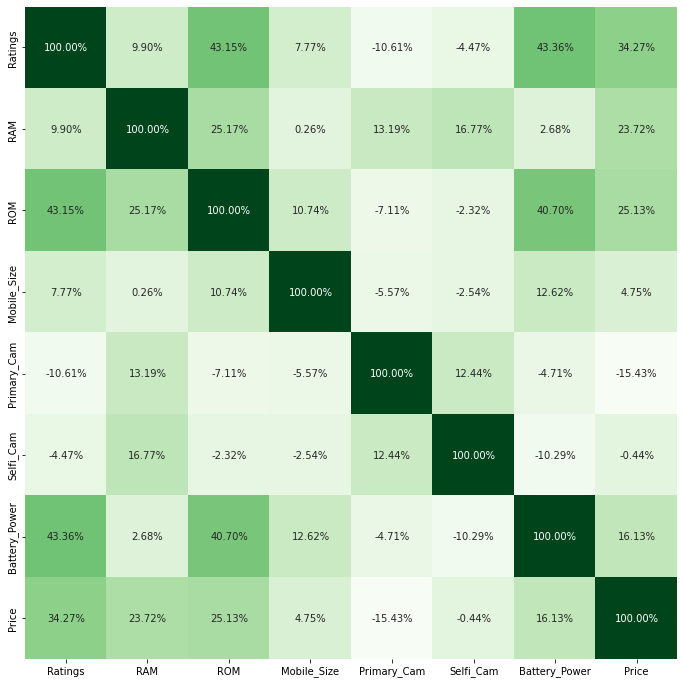

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

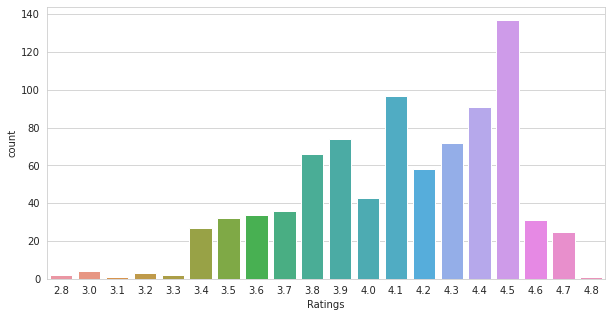

In [21]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='Ratings',data=df)

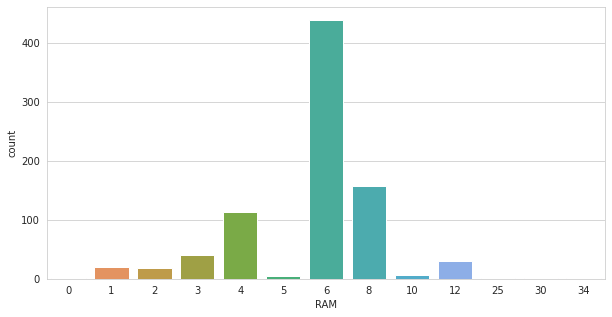

In [22]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='RAM',data=df)

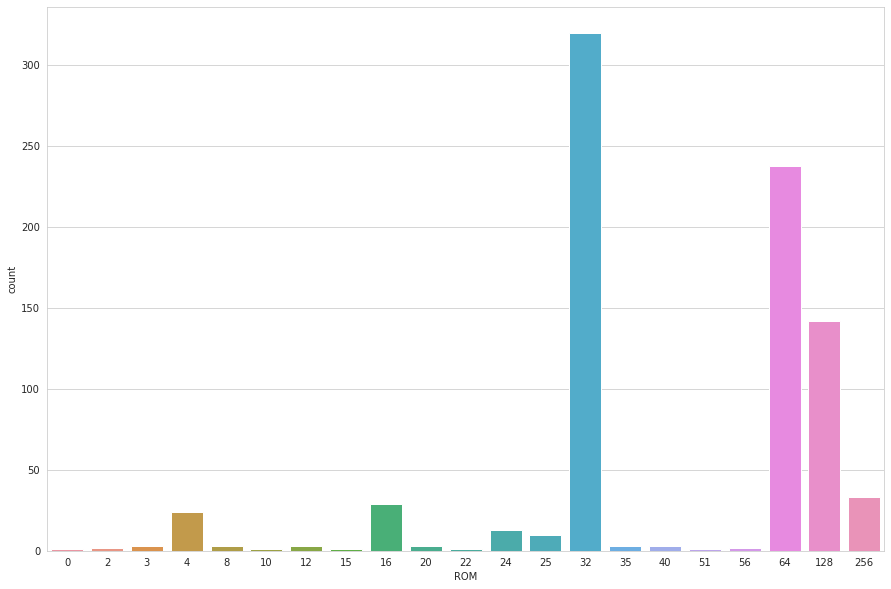

In [23]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='ROM',data=df)

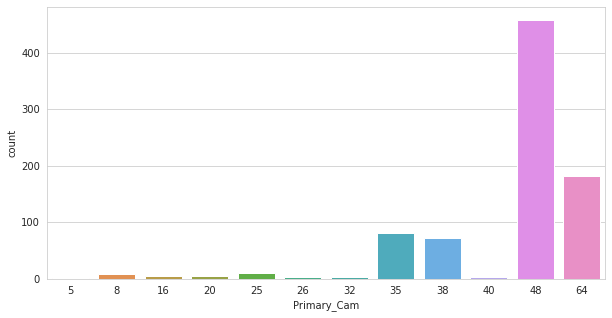

In [24]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='Primary_Cam',data=df)

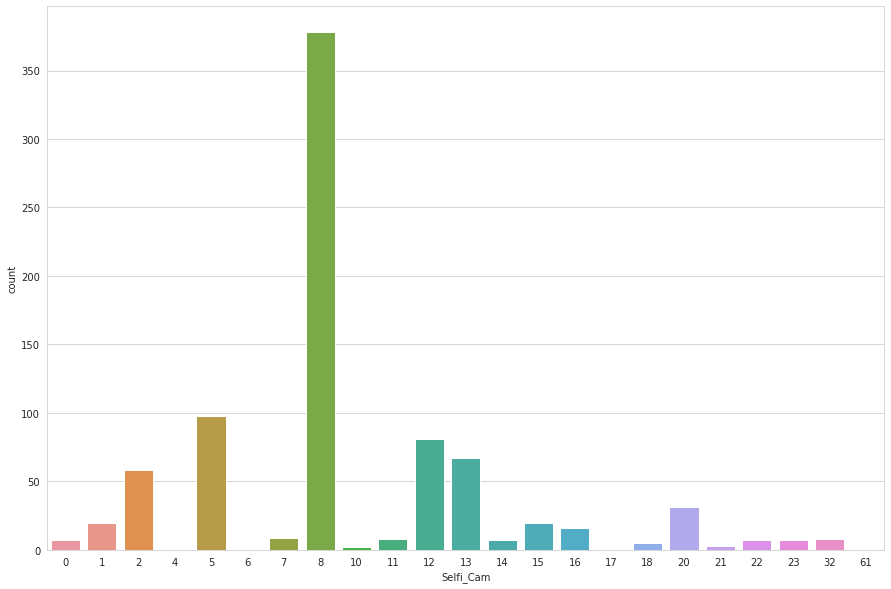

In [25]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Selfi_Cam',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


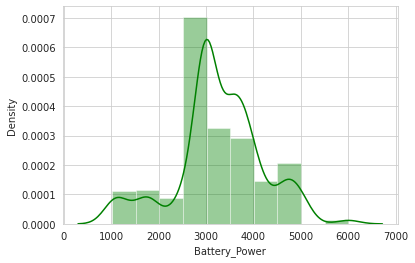

In [26]:
sns.distplot(df['Battery_Power'].dropna(),color='green',bins=10,kde=True)

<Figure size 720x720 with 0 Axes>

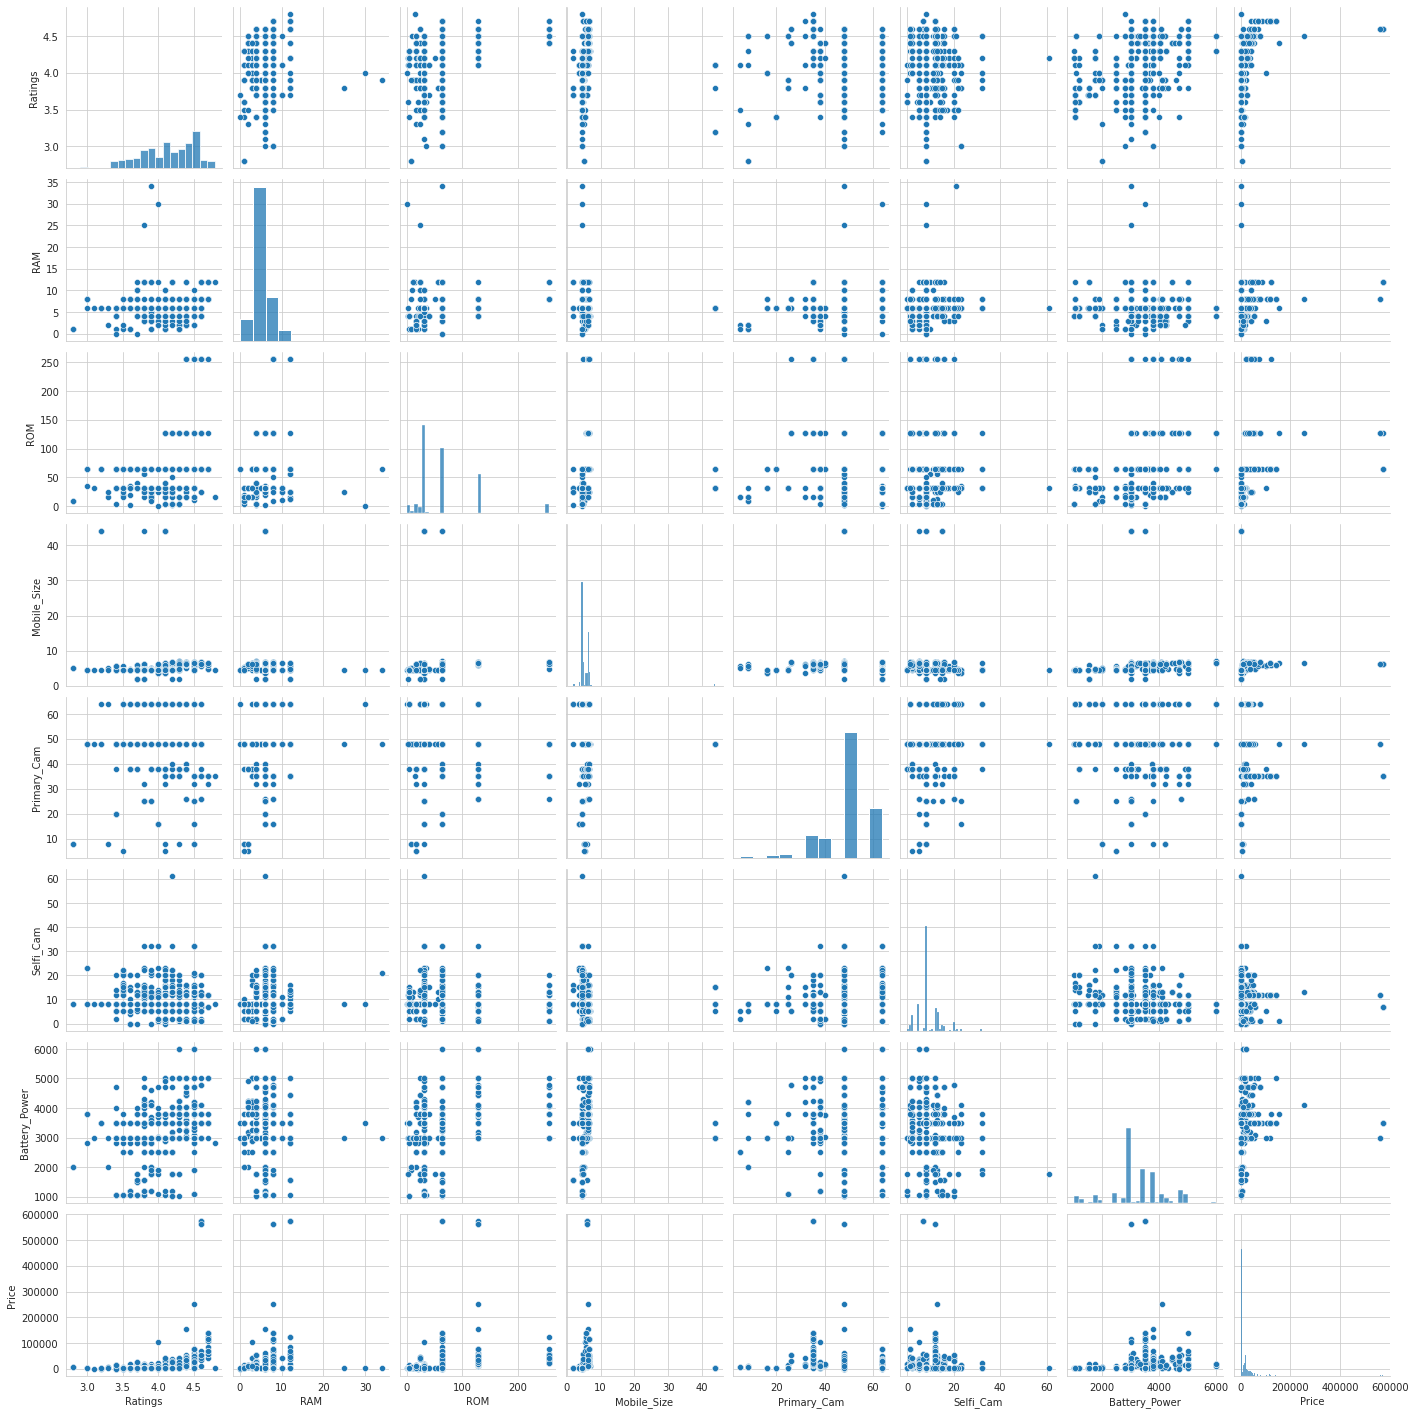

In [27]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

**Feature selection**

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
X = df.iloc[:,1:7]  
y = df.iloc[:,[-1]]

In [30]:
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)

In [31]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [32]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

In [33]:
featureScores

,Specs,Score
0,RAM,595.450839
1,ROM,30771.933499
2,Mobile_Size,867.193023
3,Primary_Cam,1436.356155
4,Selfi_Cam,1333.721900
5,Battery_Power,154591.267237


In [34]:
print(featureScores.nlargest(6,'Score'))

           Specs          Score
5  Battery_Power  154591.267237
1            ROM   30771.933499
3    Primary_Cam    1436.356155
4      Selfi_Cam    1333.721900
2    Mobile_Size     867.193023
0            RAM     595.450839


### **Model Fitting**

 **Random Forest Regressor**

In [35]:
X = df.iloc[:,[6,2,4,5,1,3]]
y = df.iloc[:,[-1]]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [37]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [38]:
y_pred = reg.predict(X_train)

In [39]:
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 95.35993203008987


In [40]:
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 94.23239230231577


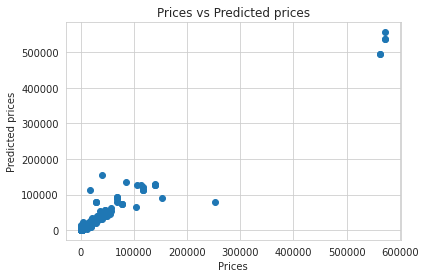

In [41]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [42]:

reg.predict([[4000,128,48,13,4,6.00]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([24209.45])

 **Decision Tree**
 

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
reg1 = DecisionTreeRegressor()
reg1.fit(X_train,y_train)

DecisionTreeRegressor()

In [45]:
y_pred = reg1.predict(X_train)

In [46]:
print("Training Accuracy:",reg1.score(X_train,y_train)*100)

Training Accuracy: 97.92355512773332


In [47]:
print("Testing Accuracy:",reg1.score(X_test,y_test)*100)

Testing Accuracy: 95.58194558252227


In [48]:
reg1.predict([[4000,128,48,13,4,6.00]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([24999.])

**KNN**

In [49]:
from sklearn import neighbors

In [50]:
knn = neighbors.KNeighborsRegressor()

In [51]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [52]:
print("Training Accuracy:",knn.score(X_train,y_train)*100)

Training Accuracy: 53.16139905689836


In [53]:
print("Testing Accuracy:",knn.score(X_test,y_test)*100)

Testing Accuracy: 6.223846326911209


In [54]:
X 

,Battery_Power,ROM,Primary_Cam,Selfi_Cam,RAM,Mobile_Size
0,4000,128,48,13,4,6.00
1,4000,64,48,12,6,4.50
2,4000,64,64,16,4,4.50
3,3800,64,48,15,6,6.40
4,3800,128,32,15,6,6.18
...,...,...,...,...,...,...
831,2800,32,48,12,6,4.54
832,2500,64,64,8,8,4.54
833,3800,32,48,1,3,6.20
834,3500,32,64,8,10,4.50


In [55]:
df.columns

Index(['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power', 'Price'],
      dtype='object')

In [56]:
l=['Battery_Power','ROM','Primary_Cam','Selfi_Cam','RAM','Mobile_Size']
l1=[]
for i in range(len(l)):
  l1.append(float(input(l[i])))

Battery_Power5000
ROM128
Primary_Cam8
Selfi_Cam16
RAM6
Mobile_Size6.0


In [57]:
z=reg.predict([l1])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [58]:
z[0]

21520.53

In [59]:
import pickle

In [60]:
pickle.dump(df,open("df.pkl",'wb'))
pickle.dump(reg,open("reg.pkl",'wb'))
pickle.dump(reg1,open("reg1.pkl",'wb'))